In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import image_dataset_from_directory

from pathlib import Path
from numpy import argmax

import matplotlib.pyplot as plt

In [20]:
# сюда путь до картинок
base_dir = Path('C:/Users/noname1209140143/code/emotions_generator/data').parent / 'data'

val_dir = base_dir / 'val'

anger_dir = val_dir / 'anger'
disgust_dir = val_dir / 'disgust'
fear_dir = val_dir / 'fear'
happy_dir = val_dir / 'happy'
neutral_dir = val_dir / 'neutral'
sad_dir = val_dir / 'sad'
surprise_dir = val_dir / 'surprise'

In [21]:
# сюда путь до модели
model = load_model('C:/Users/noname1209140143/code/emotions_generator/model.keras')

In [22]:
val = image_dataset_from_directory(directory = val_dir,
                                   color_mode = 'grayscale',
                                   image_size = (64, 64),
                                   crop_to_aspect_ratio=True)

Found 21 files belonging to 7 classes.


In [23]:
# тут хранятся картинки которые пойдут в предсказания
imgs=[]
# здесь метки этих картинок
labels=[]

for img, label in val:
    imgs.append(img)
    labels.append(label)

In [24]:
# словарь для перевода предсказаний и меток в слова
emotions_decoding_dict = ('anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise')

In [25]:
# перевод меток из цифр в слова
decoded_labels = [emotions_decoding_dict[label] for label in labels[0]]

In [26]:
# предсказания из imgs и перевод в слова
decoded_preds = [emotions_decoding_dict[argmax(pred)] for pred in model.predict(imgs)]

1/1 [==============================] - 0s 202ms/step


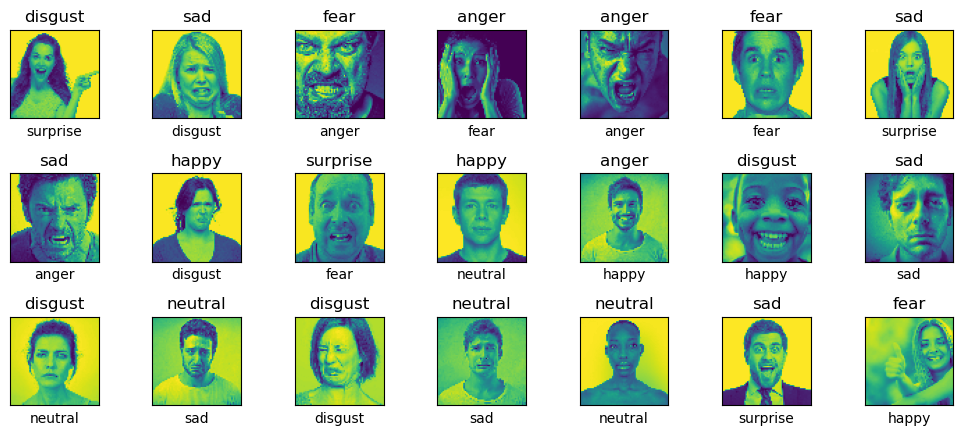

In [49]:
fig = plt.figure(figsize=(10, 10))
for i in range(21):
    ax = plt.subplot(7, 7, i+1)
    fig.tight_layout()
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks([])
    
    # здесь картинка
    plt.imshow(imgs[0][i].numpy().astype("uint8"))
    
    # здесь предсказание
    plt.title(decoded_preds[i])
    
    # здесь реальная метка
    plt.xlabel(decoded_labels[i])